In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Problem 1

In [8]:
data = np.loadtxt("homework_2_data.txt")
X_b = data[:,0]
Y_b = data[:,1]

X_bias = np.append(np.expand_dims(X_b, axis=1), np.ones((X_b.shape[0],1)), axis=1)

w = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(Y_b)

[-4.0793595   6.59017553]


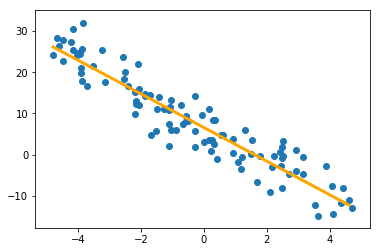

weights: [-4.0793595   6.59017553]


In [17]:
X_range = np.arange(np.min(X_b), np.max(X_b), 0.1)
X_inputs = np.append(np.expand_dims(X_range, axis=1), np.ones((X_range.shape[0],1)), axis=1)

plt.plot(X_range, X_inputs.dot(w), color="orange", lw=3)
plt.scatter(X_b, Y_b)
plt.show()
print("weights: " + str(w))

### Problem 2

In [20]:
#We're going to try and fit a polynomial function to a noisy time series and
#see how various values of lambda influences the fit

def poly_basis(x, k):
    #this function will help us quickly generate a polynomial basis
    #k is the largest polynomial degree the basis runs to
    out = []
    for i in range(k+1):
        #notice that first value of i will be 0, so the bias term is included
        out.append(np.power(x, i))
    return(out)

X_ran = np.arange(-2,2,0.004)  #the range of values we'll consider

X_poly_basis = np.asarray(poly_basis(X_ran, 10)).T    #the range of values passed through a polynomial basis

#generate a noisy time series
Y = [0.0]
for i in range(999):
    Y.append(Y[-1]+np.random.normal(0,2))

/home/chase/applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


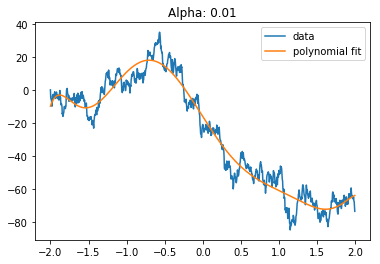

coefficients: 
[-16.21230741 -72.64297194   4.87078273  51.15613928 -19.61552278
 -15.83088083   5.56767827   1.32057055   0.40931654   0.09085781
  -0.18308103]


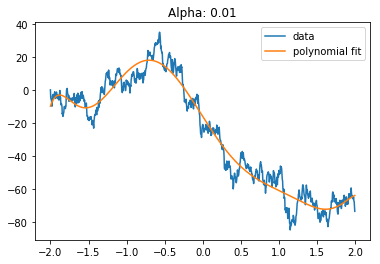

coefficients: 
[-16.21230741 -72.64297194   4.87078273  51.15613928 -19.61552278
 -15.83088083   5.56767827   1.32057055   0.40931654   0.09085781
  -0.18308103]


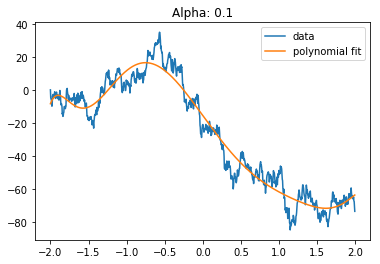

coefficients: 
[-15.58806887 -63.63574356  -0.          30.56188157 -12.17260644
  -1.6334524    1.64775054  -2.5076383    1.22232629   0.44609692
  -0.23833922]


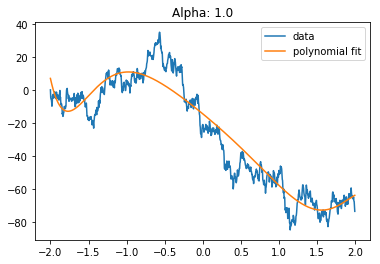

coefficients: 
[-1.45278396e+01 -3.79608252e+01 -6.10584592e+00  0.00000000e+00
 -3.16070680e+00  3.72369331e+00 -0.00000000e+00  0.00000000e+00
  2.38539639e-01 -1.53613567e-01 -1.53211275e-05]


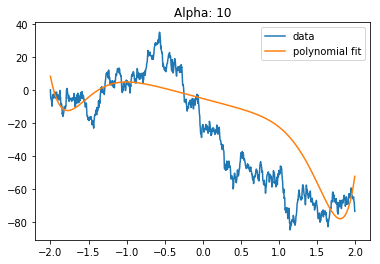

coefficients: 
[ -5.22887726 -12.36340525  -0.          -0.          -1.45162997
  -1.34481974  -2.33273599  -0.          -0.           0.07438424
   0.15264145]


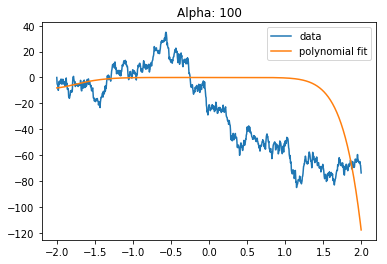

coefficients: 
[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.24955735 -0.10908209 -0.        ]


In [23]:
alphas = [0.01, 0.01, 0.1, 1.0, 10, 100] #pick 5 values

for a in alphas:
    lasso_regressor = linear_model.Lasso(alpha=a, fit_intercept=False, tol=0.01, max_iter=10000)

    #this fits the outputs Y to the polynomial basis of inputs in the range -2 to 2
    lasso_regressor.fit(X_poly_basis, Y)

    #these are the weights the model learns
    w = lasso_regressor.coef_
    
    plt.title("Alpha: " + str(a))
    plt.plot(X_ran,Y, label="data")
    plt.plot(X_ran,X_poly_basis.dot(w), label="polynomial fit")
    plt.legend()
    plt.show()

    print("coefficients: ")
    print(w)

Comments: As alpha gets larger, the number of non-zero weights decreases as the l1 norm selects dominant features in the data, with respect to the chosen basis, but the model fits poorly. For smaller alpha, the fit of the function increases as the model incorporates more features with non-zero weights.

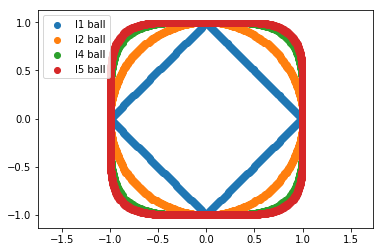

In [27]:
def l1_norm(x):
    out = 0
    for x_i in x:
        out += np.abs(x_i)
    return(out)

def l2_norm(x):
    out = 0
    for x_i in x:
        out += np.power(x_i, 2)
    return(np.sqrt(out))

def lp_norm(x, p):
    out = 0
    for x_i in x:
        out += np.power(np.abs(x_i), p)
    return(np.power(out, 1/p))

x_1 = np.arange(-1,1,0.01)
x_2 = np.arange(-1,1,0.01)
tol = 0.01

l1_unit_ball_values = []
l2_unit_ball_values = []

l4_unit_ball_values = []
l5_unit_ball_values = []

for x_i in x_1:
    for x_j in x_2:
        l1 = l1_norm([x_i, x_j])
        l2 = l2_norm([x_i, x_j])
        
        l4 = lp_norm([x_i, x_j], 4)
        l5 = lp_norm([x_i, x_j], 5)
        
        if l1 > 1 - tol and  l1 < 1 + tol:   #check to see if the value of the L1 norm is close to 1
            l1_unit_ball_values.append([x_i, x_j])
        if l2 > 1 - tol and l2 < 1 + tol:    #check to see if the value of the L2 norm is close to 1 
            l2_unit_ball_values.append([x_i, x_j])
            
        if l4 > 1 - tol and l4 < 1 + tol:
            l4_unit_ball_values.append([x_i, x_j])
        if l5 > 1 - tol and l5 < 1 + tol:
            l5_unit_ball_values.append([x_i, x_j])
        
l1_ball = np.asarray(l1_unit_ball_values) #transform the list of vectors/pairs into a numpy array
l2_ball = np.asarray(l2_unit_ball_values)

l4_ball = np.asarray(l4_unit_ball_values)
l5_ball = np.asarray(l5_unit_ball_values)

plt.scatter(l1_ball[:,0], l1_ball[:,1], label="l1 ball")
plt.scatter(l2_ball[:,0], l2_ball[:,1], label="l2 ball")

plt.scatter(l4_ball[:,0], l4_ball[:,1], label="l4 ball")
plt.scatter(l5_ball[:,0], l5_ball[:,1], label="l5 ball")

plt.legend(loc=2)
plt.axis('equal') #this makes the axes the same scale so that the circle isn't elliptical looking
plt.show()

Comments: the L$\infty$ norm looks like a square, as all vectors a distance of 1 away from the origin are such that $max[x_i, x_j] = 1$, meaning that either $x_i$ is 1, or $x_j$ is 1, regardless of what the other value equals.

In [ ]:
#### Problem 4

There was a typo in the defintion of the huber loss, here's what it should have look like, but no points will be taken off for plotting the function as was given in the homework originally.

<center>$\mathcal{L}_{huber}(y, \hat{y}) = \begin{cases} \frac{1}{2}(y - \hat{y})^{2} & |y - \hat{y}| \leq 1 \\ |y - \hat{y}| - \frac{1}{2} & |y - \hat{y}| > 1 \end{cases}$</center>


In [37]:
def huber(errors):
    #error is a list of values y - \hat{y}
    loss = []
    for value in errors:
        if value > 1:
            h = np.abs(value) - 0.5
            loss.append(h)
        else:
            h = 0.5*np.power(value, 2)
            loss.append(h)
    return(loss)

x_range = np.arange(-2,2,0.1)
l1 = np.abs(x_range)
l2 = np.power(x_range, 2)
h = huber(x_range)



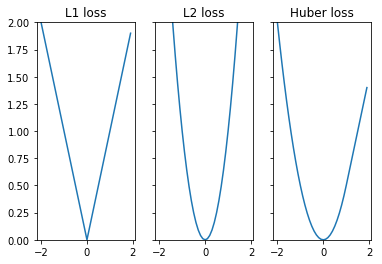

In [40]:
#You can accomplish this a few ways, but I ripped this from the tutorial page. It's important to be able 
#to do this so you can save multiple plots in a single image file for documentation, the figure object
#f is the single image object in memory, and the ax1, ax2, ax3 are the objects that allow you to edit each subplot

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

ax1.plot(x_range, l1)
ax1.set_title('L1 loss')

ax2.plot(x_range, l2)
ax2.set_title("L2 loss")

ax3.plot(x_range, h)
ax3.set_title("Huber loss")

plt.ylim(0,2)
plt.show()

The huber loss is robust to outliers because for larger values of the error, it looks like the l1 loss.  The Huber loss is useful because unlike the l1 loss, it is differentiable where the error is equal to 0, allowing us to apply tools like gradient descent directly.